Step1-3:

Imports half of the libraries needed(the rest are in step 3 mostly or each model imported every time its called

Then it adds the column labels and prints the resulting dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
df=pd.read_csv("irisdata.csv")
df.columns = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
df

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


Step 4:

Prepares the main information needed for later and splits data into 20%(test) and 80%(training)

In [2]:
    y = df.iloc[:, 4].values
    selected_X = df.iloc[:, 0:4].values

    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    encoded_y = LabelEncoder().fit_transform(y)
    encoded_X = OneHotEncoder().fit_transform(selected_X).toarray()

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(encoded_X, encoded_y, test_size=0.20, random_state=7)

Step5.1:

Logistic Regression Prep

In [3]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
LR_model.fit(X_train, y_train) #and actually does the regression itself
LR_pred = LR_model.predict(X_test) #Makes a prediction based on X
LR_score = LR_model.score(X_test,y_test) #Gets the accuracy of our end result

print(LR_score)

0.9666666666666667


Step5.2:
    
KNN Regression Prep

Also finds best number for K

In [5]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score_i = knn.score(X_test,y_test)
    scores.append(score_i)

Text(0, 0.5, 'Accuracy')

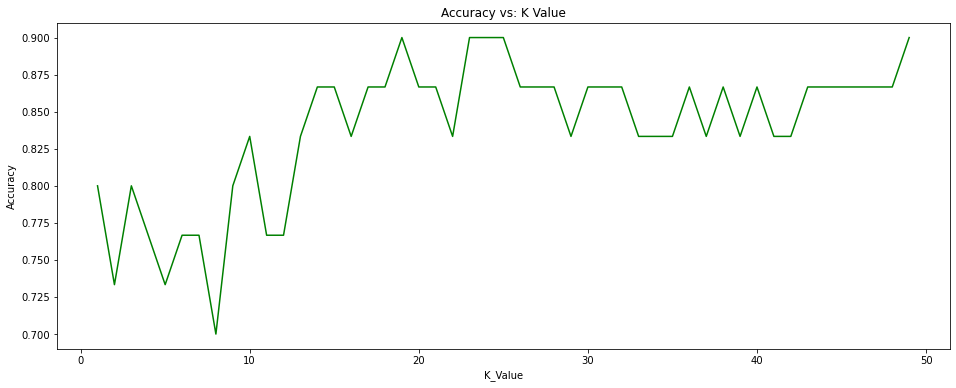

In [6]:
plt.figure(figsize =(16,6))
plt.plot(range(1,50),scores,color = 'green')
plt.title('Accuracy vs: K Value')
plt.xlabel('K_Value')
plt.ylabel('Accuracy')

In [7]:
max(scores)

0.9

In [8]:
best_knn = scores.index(0.9)+1
print(best_knn)

19


In [9]:
K = 19

K_model = KNeighborsClassifier(n_neighbors=K)
K_model.fit(X_train, y_train) 
K_pred = K_model.predict(X_test)
K_score = K_model.score(X_test,y_test)
print(K_score)

0.9


Step 5.3:

Decision Tree Prep

In [10]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="gini" , splitter='best')
DT_model.fit(X_train, y_train)
    
DT_pred = DT_model.predict(X_test)
DT_score = DT_model.score(X_test,y_test)
print(DT_score)

0.8666666666666667


Step 5.4:

Random Decision Tree Prep

In [11]:
from sklearn.ensemble import RandomForestClassifier 
RF_model = RandomForestClassifier(n_estimators=100, criterion='gini')
RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)
RF_score = RF_model.score(X_test,y_test)
print(RF_score)

0.9333333333333333


Step 5.5:

SVM Prep

Uses Grid Search to find best SVC data

In [12]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf','linear']} 

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [14]:
grid = GridSearchCV(SVC(), param_grid, verbose=2, refit = True)

In [15]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .................C=1000, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .................C=1000, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ................C=1000, gamma=0.0001, kernel=linear; total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [16]:
print('The best parameters are %s with a score of %0.2f' 
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} with a score of 0.95


In [17]:
from sklearn import datasets

SVclassifier = SVC(kernel='rbf',C=10,gamma=0.01)
SV_model = SVclassifier.fit(X_train, y_train)
SV_pred = SVclassifier.predict(X_test)
SV_score = SV_model.score(X_test,y_test)
print(SV_score)

0.9666666666666667


Step 5.6:
    
Gaussian Naive Bayes Prep

In [18]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(X_train, y_train)
NB_pred = NB_model.predict(X_test)
NB_score = NB_model.score(X_test,y_test)
print(NB_score)

0.8


Step 6:

Compares the predicted and actual output of each of the models by building the confusion matrices of each model

In [30]:
print(confusion_matrix(y_test, LR_pred))
print(classification_report(y_test, LR_pred))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [31]:
print(confusion_matrix(y_test, K_pred))
print(classification_report(y_test, K_pred))

[[ 7  0  0]
 [ 2  9  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.75      0.86        12
           2       0.92      1.00      0.96        11

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.92      0.90      0.90        30



In [25]:
print(confusion_matrix(y_test, DT_pred))
print(classification_report(y_test, DT_pred))

[[ 7  0  0]
 [ 0  9  3]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      0.75      0.82        12
           2       0.77      0.91      0.83        11

    accuracy                           0.87        30
   macro avg       0.89      0.89      0.88        30
weighted avg       0.88      0.87      0.87        30



In [32]:
print(confusion_matrix(y_test, RF_pred))
print(classification_report(y_test, RF_pred))

[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [33]:
print(confusion_matrix(y_test, SV_pred))
print(classification_report(y_test, SV_pred))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [34]:
print(confusion_matrix(y_test, NB_pred))
print(classification_report(y_test, NB_pred))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  5  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.69      0.92      0.79        12
           2       0.86      0.55      0.67        11

    accuracy                           0.80        30
   macro avg       0.85      0.82      0.82        30
weighted avg       0.82      0.80      0.79        30



By looking over the 6 matrix's, you can tell that either a Logistic Regression or Support Vector Machine would be ideal

Step 7:

Making a graph using the scores from each and showing which ones are best

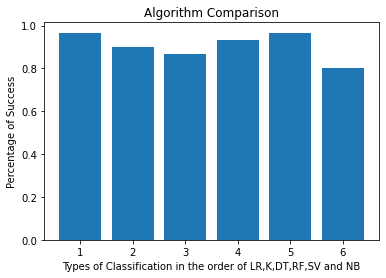

In [43]:
newy=[LR_score,K_score,DT_score,RF_score,SV_score,NB_score]
newx=[1,2,3,4,5,6]
plt.bar(newx, newy)
plt.xlabel("Types of Classification in the order of LR,K,DT,RF,SV and NB")
plt.ylabel("Percentage of Success")
plt.title("Algorithm Comparison")
plt.show()